New code


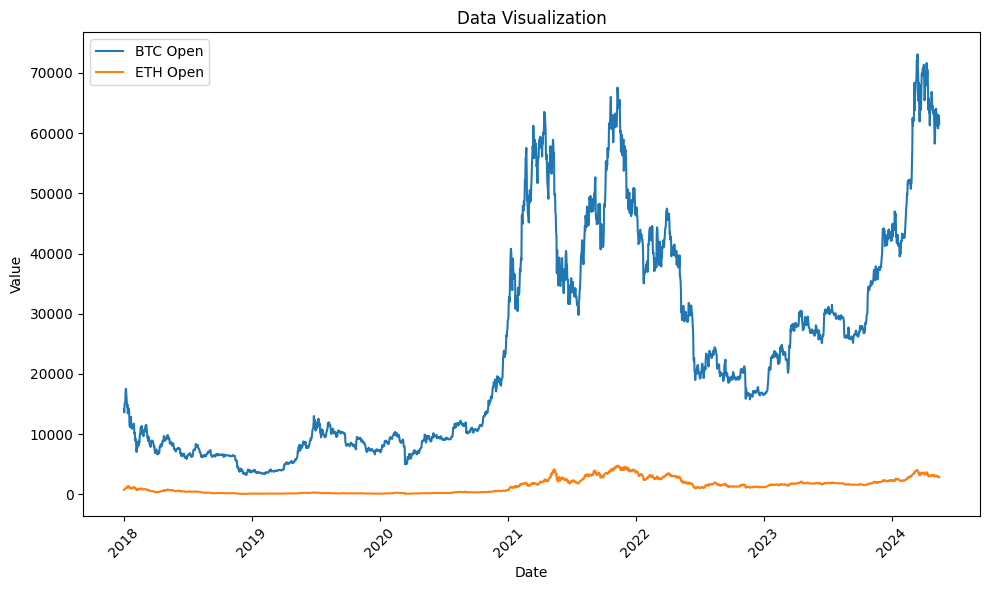

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('BTC.csv')

# Convert the 'Date' column to datetime if it's not already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(data['Date'], data['ob'], label='BTC Open')
plt.plot(data['Date'], data['oe'], label='ETH Open')

plt.title('Data Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [139]:
import numpy as np
print(np.corrcoef(data['ob'],data['oe'])[0, 1])
print(((data['ob'] - data['oe']) ** 2).mean())
print(((data['ob'] - data['oe']*16.067) ** 2).mean())

0.927653534125537
783337053.7291132
53650994.75830706


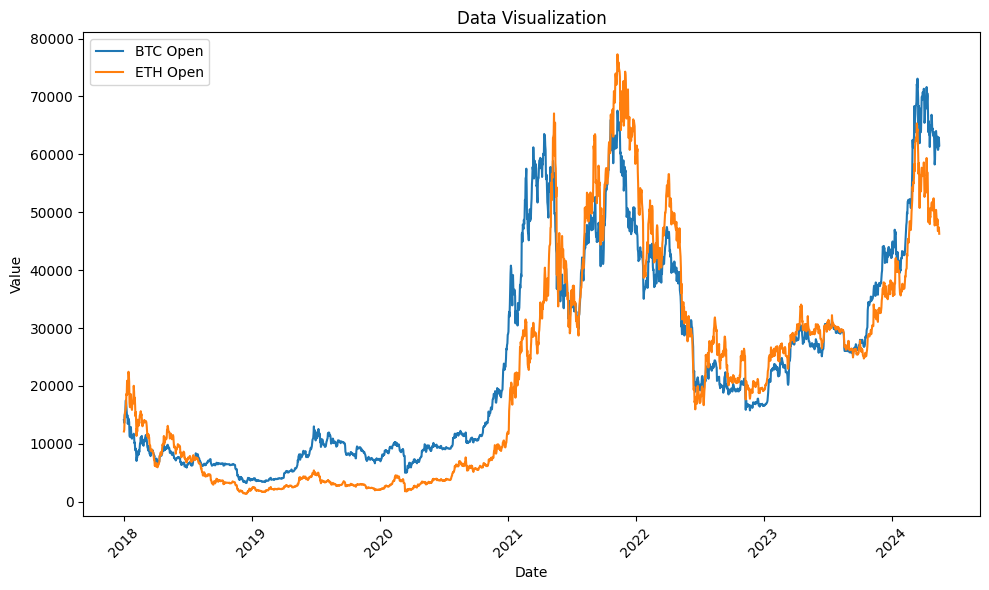

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('BTC.csv')

# Convert the 'Date' column to datetime if it's not already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(data['Date'], data['ob'], label='BTC Open')
plt.plot(data['Date'], data['oe']*16.067, label='ETH Open')

plt.title('Data Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


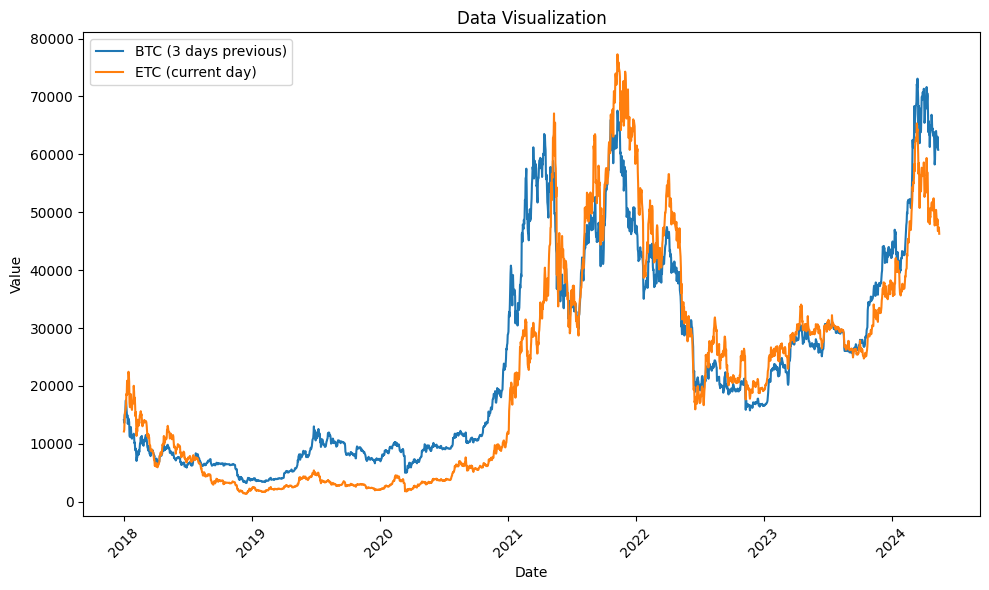

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('BTC.csv')

# Convert the 'Date' column to datetime if it's not already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the date three days prior
three_days_previous = data['Date'] - pd.Timedelta(days=3)

# Filter the data for the 2nd column three days previous
previous_second_column = data[data['Date'].isin(three_days_previous)]['ob']

# Filter the data for the 3rd column for the current day
current_third_column = data[data['Date'].isin(three_days_previous + pd.Timedelta(days=3))]['oe']

# Remove the last three days from the 2nd column data
data_filtered = data[:-3]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(data_filtered['Date'], data_filtered['ob'], label='BTC (3 days previous)')
plt.plot(three_days_previous + pd.Timedelta(days=3), current_third_column*16.067, label='ETC (current day)')

plt.title('Data Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('BTC.csv')

# Assuming the data has columns 'Date', '2nd_column', '3rd_column'
# Replace '2nd_column' and '3rd_column' with the actual column names in your CSV
second_column = data['ob'].values.reshape(-1, 1)
third_column = data['oe'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
second_column_scaled = scaler.fit_transform(second_column)
third_column_scaled = scaler.fit_transform(third_column)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)



In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define sequence length
seq_length = 16

# Create sequences
X, y = create_sequences(second_column_scaled, seq_length)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=500, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)



Epoch 1/100
58/58 [==============================] - 3s 44ms/step - loss: 0.0079 - val_loss: 3.2062e-04
Epoch 2/100
58/58 [==============================] - 2s 43ms/step - loss: 0.0010 - val_loss: 4.9066e-04
Epoch 3/100
58/58 [==============================] - 2s 42ms/step - loss: 9.3206e-04 - val_loss: 5.5189e-04
Epoch 4/100
58/58 [==============================] - 2s 42ms/step - loss: 7.9836e-04 - val_loss: 5.3828e-04
Epoch 5/100
58/58 [==============================] - 2s 42ms/step - loss: 7.0117e-04 - val_loss: 2.2420e-04
Epoch 6/100
58/58 [==============================] - 3s 44ms/step - loss: 6.3438e-04 - val_loss: 2.6188e-04
Epoch 7/100
58/58 [==============================] - 2s 43ms/step - loss: 7.4726e-04 - val_loss: 9.1636e-04
Epoch 8/100
58/58 [==============================] - 3s 44ms/step - loss: 7.3452e-04 - val_loss: 2.0800e-04
Epoch 9/100
58/58 [==============================] - 2s 42ms/step - loss: 5.1307e-04 - val_loss: 3.1205e-04
Epoch 10/100
58/58 [================

In [156]:

print(min(pred))
print(max(pred))
sorted_list = sorted(pred, key=lambda x: x[1])

print(sorted_list)

[0.00046539833419956267, 16]
[0.0010043350048363209, 18]
[[0.0005720132030546665, 1], [0.0006421564612537622, 2], [0.0004995783674530685, 3], [0.0005383393727242947, 4], [0.0005543785518966615, 5], [0.0006718309596180916, 6], [0.000546306255273521, 7], [0.0005360267241485417, 8], [0.0005302696954458952, 9], [0.0005949578480795026, 10], [0.0005756287719123065, 11], [0.0005310989799909294, 12], [0.0006205562385730445, 13], [0.0005753469304181635, 14], [0.0006793389329686761, 15], [0.00046539833419956267, 16], [0.0005238968878984451, 17], [0.0010043350048363209, 18], [0.0008440101519227028, 19]]


In [162]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('BTC.csv')

# Assuming the data has columns 'Date', '2nd_column', '3rd_column'
# Replace '2nd_column' and '3rd_column' with the actual column names in your CSV
second_column = data['ob'].values.reshape(-1, 1)
third_column = data['oe'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
second_column_scaled = scaler.fit_transform(second_column)
third_column_scaled = scaler.fit_transform(third_column)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(second_column_scaled, dtype=torch.float32)
y_tensor = torch.tensor(third_column_scaled, dtype=torch.float32)
pred = []
for i in range(1,30):
    # Define sequence length
    seq_length = i

    # Create sequences
    X, y = create_sequences(second_column_scaled, seq_length)

    # Convert sequences to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    # Split the data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

    # Define the LSTM model
    class LSTMModel(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(LSTMModel, self).__init__()
            self.hidden_size = hidden_size
            self.lstm = nn.LSTM(input_size, hidden_size)
            self.fc = nn.Linear(hidden_size, output_size)
        
        def forward(self, x):
            lstm_out, _ = self.lstm(x)
            output = self.fc(lstm_out[:, -1, :])
            return output

    # Move data and model to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    X_train, X_val, X_test = X_train.to(device), X_val.to(device), X_test.to(device)
    y_train, y_val, y_test = y_train.to(device), y_val.to(device), y_test.to(device)
    model = LSTMModel(1, 100, 1).to(device)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training the model
    epochs = 100
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        mse = criterion(outputs, y_test)
        print(seq_length,"Mean Squared Error:", mse.item())
        pred.append((seq_length,mse.item()))
for i in range(len(pred)):
    print(pred[i])


Epoch [10/100], Loss: 0.0513201504945755
Epoch [20/100], Loss: 0.040059950202703476
Epoch [30/100], Loss: 0.024250559508800507
Epoch [40/100], Loss: 0.007058749906718731
Epoch [50/100], Loss: 0.004794520791620016
Epoch [60/100], Loss: 0.0024400397669523954
Epoch [70/100], Loss: 0.0017726847436279058
Epoch [80/100], Loss: 0.0011715155560523272
Epoch [90/100], Loss: 0.0009689569124020636
Epoch [100/100], Loss: 0.0008577522821724415
1 Mean Squared Error: 0.0024329754523932934
Epoch [10/100], Loss: 0.06863518059253693
Epoch [20/100], Loss: 0.045420728623867035
Epoch [30/100], Loss: 0.033454932272434235
Epoch [40/100], Loss: 0.01068536750972271
Epoch [50/100], Loss: 0.007690635975450277
Epoch [60/100], Loss: 0.0032421667128801346
Epoch [70/100], Loss: 0.002132162218913436
Epoch [80/100], Loss: 0.0014993365621194243
Epoch [90/100], Loss: 0.0010938298655673862
Epoch [100/100], Loss: 0.0008894572965800762
2 Mean Squared Error: 0.0025386859197169542
Epoch [10/100], Loss: 0.07086776942014694
Epo

Best Sequence Number

In [168]:
sorted_list = sorted(pred, key=lambda x: x[1])
sorted_list

[(14, 0.0019355573458597064),
 (16, 0.002114376984536648),
 (27, 0.0022166380658745766),
 (9, 0.002219853922724724),
 (20, 0.0022836164571344852),
 (1, 0.0024329754523932934),
 (12, 0.0024934986140578985),
 (15, 0.002504106843844056),
 (2, 0.0025386859197169542),
 (22, 0.0025442831683903933),
 (13, 0.00270815659314394),
 (24, 0.002713763155043125),
 (17, 0.002855288330465555),
 (6, 0.003076714463531971),
 (4, 0.003107302589341998),
 (23, 0.003131915582343936),
 (11, 0.0031702902633696795),
 (10, 0.0031760036945343018),
 (25, 0.003190073184669018),
 (3, 0.0032819390762597322),
 (28, 0.0033627271186560392),
 (26, 0.003399183740839362),
 (8, 0.003790079616010189),
 (19, 0.004302693530917168),
 (29, 0.004343558102846146),
 (5, 0.006013263016939163),
 (18, 0.007739592343568802),
 (7, 0.04320986568927765),
 (21, 0.04687267914414406)]

In [191]:
# Define sequence length
seq_length = 14

# Create sequences
X, y = create_sequences(second_column_scaled, seq_length)

# Convert sequences to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])
        return output

# Move data and model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train, X_val, X_test = X_train.to(device), X_val.to(device), X_test.to(device)
y_train, y_val, y_test = y_train.to(device), y_val.to(device), y_test.to(device)
model = LSTMModel(1, 1000, 1).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1):
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    mse = criterion(outputs, y_test)
    print(seq_length,"Mean Squared Error:", mse.item())
    pred.append((seq_length,mse.item()))

Epoch [1/10000], Loss: 0.12867872416973114
Epoch [2/10000], Loss: 0.07403973489999771
Epoch [3/10000], Loss: 0.05231853201985359
Epoch [4/10000], Loss: 0.053240638226270676
Epoch [5/10000], Loss: 0.04280347749590874
Epoch [6/10000], Loss: 0.04283330962061882
Epoch [7/10000], Loss: 0.038206011056900024
Epoch [8/10000], Loss: 0.024977052584290504
Epoch [9/10000], Loss: 18.516908645629883
Epoch [10/10000], Loss: 0.02710927277803421
Epoch [11/10000], Loss: 0.049212899059057236
Epoch [12/10000], Loss: 0.06354443728923798
Epoch [13/10000], Loss: 0.07309576869010925
Epoch [14/10000], Loss: 0.07969660311937332
Epoch [15/10000], Loss: 0.08435305953025818
Epoch [16/10000], Loss: 0.08765077590942383
Epoch [17/10000], Loss: 0.08995354920625687
Epoch [18/10000], Loss: 0.09149646759033203
Epoch [19/10000], Loss: 0.09244021028280258
Epoch [20/10000], Loss: 0.0928962230682373
Epoch [21/10000], Loss: 0.09294524788856506
Epoch [22/10000], Loss: 0.09264299273490906
Epoch [23/10000], Loss: 0.0920306444168

In [192]:
# Define the file path where you want to save the model
model_path = 'trainPytorch3.pth'

# Save the model
torch.save(model.state_dict(), model_path)


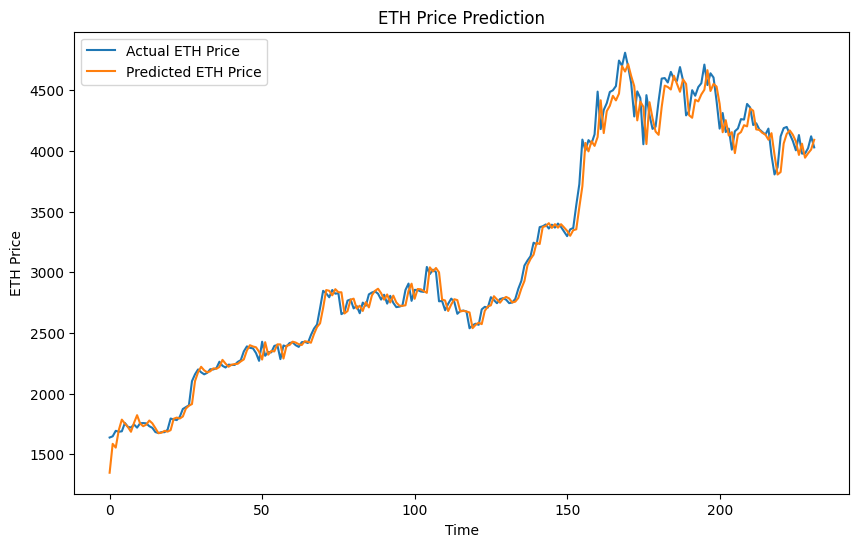

In [193]:
import matplotlib.pyplot as plt

# Convert predictions and ground truth tensors back to NumPy arrays
predictions = outputs.cpu().detach().numpy()
y_test_np = y_test.cpu().detach().numpy()

# Denormalize the predicted and ground truth values
predictions_denormalized = scaler.inverse_transform(predictions)
y_test_denormalized = scaler.inverse_transform(y_test_np)

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_denormalized, label='Actual ETH Price')
plt.plot(predictions_denormalized, label='Predicted ETH Price')
plt.title('ETH Price Prediction')
plt.xlabel('Time')
plt.ylabel('ETH Price')
plt.legend()
plt.show()


In [210]:
from datetime import datetime, timedelta

# Get the last date in the dataset
last_date = datetime.strptime(data['Date'].iloc[-1], '%m/%d/%Y')

# Define a function to predict the next day's price along with its date
def predict_next_day_with_date(model, last_sequence, scaler, last_date, num_steps=10):
    predictions = []
    dates = []
    with torch.no_grad():
        # Convert last sequence to PyTorch tensor and move to device
        last_sequence_tensor = torch.tensor(last_sequence, dtype=torch.float32).unsqueeze(0).to(device)
        
        # Move the model to the same device as the last sequence
        model.to(device)
        
        # Predict the next day's price for the next num_steps days
        for _ in range(num_steps):
            # Make prediction
            prediction = model(last_sequence_tensor)
            
            # Move prediction to CPU and denormalize
            prediction = prediction.cpu().numpy()
            prediction = scaler.inverse_transform(prediction)[0][0]
            
            # Append prediction to list
            predictions.append(prediction)
            
            # Calculate next date
            next_date = last_date + timedelta(days=1)
            dates.append(next_date.strftime('%Y-%m-%d'))
            
            # Update last sequence with the new prediction
            last_sequence = np.roll(last_sequence, -1, axis=0)
            last_sequence[-1] = prediction
            last_sequence_tensor = torch.tensor(last_sequence, dtype=torch.float32).unsqueeze(0).to(device)
            
            # Update last date
            last_date = next_date
        
        return predictions, dates

# Get the last sequence of data
last_sequence = X_test[-1].cpu().numpy()

# Predict the next 10 days' prices along with dates
predictions_next_10_days, dates_next_10_days = predict_next_day_with_date(model, last_sequence, scaler, last_date, num_steps=10)

# Print the predictions along with dates
print("Predictions for the next 10 days:")
for date, prediction in zip(dates_next_10_days, predictions_next_10_days):
    print(f"Date: {date}, Prediction: {prediction}")


Predictions for the next 10 days:
Date: 2024-05-16, Prediction: 2850.34326171875
Date: 2024-05-17, Prediction: 27335.119140625
Date: 2024-05-18, Prediction: 27359.140625
Date: 2024-05-19, Prediction: 27359.130859375
Date: 2024-05-20, Prediction: 27359.130859375
Date: 2024-05-21, Prediction: 27359.130859375
Date: 2024-05-22, Prediction: 27359.130859375
Date: 2024-05-23, Prediction: 27359.130859375
Date: 2024-05-24, Prediction: 27359.130859375
Date: 2024-05-25, Prediction: 27359.130859375


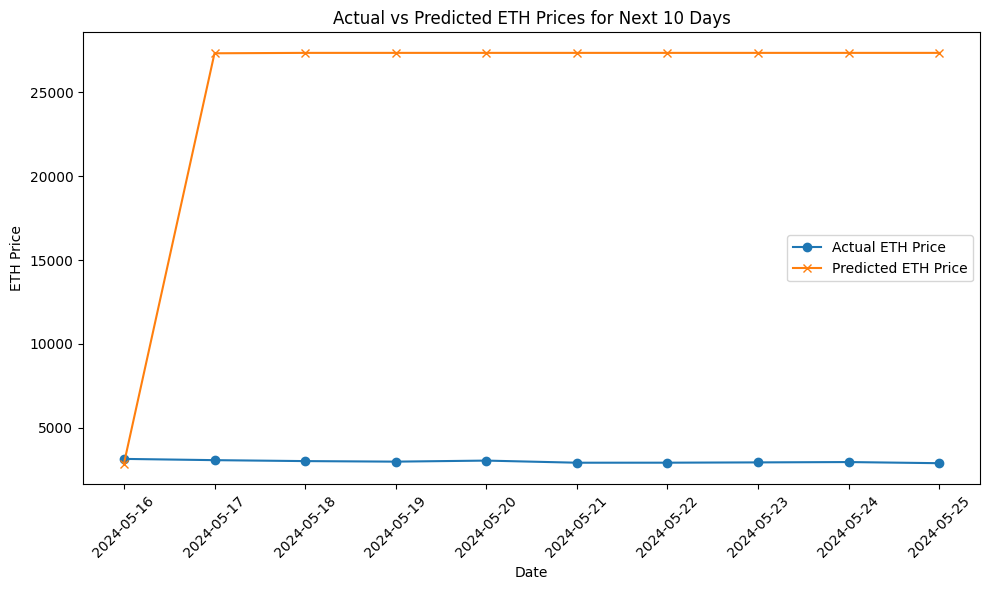

In [213]:
import matplotlib.pyplot as plt

# Get the actual data for the next 10 days
actual_data_next_10_days = data['oe'][-10:].values

# Plot the actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(dates_next_10_days, actual_data_next_10_days, marker='o', label='Actual ETH Price')
plt.plot(dates_next_10_days, predictions_next_10_days, marker='x', label='Predicted ETH Price')
plt.title('Actual vs Predicted ETH Prices for Next 10 Days')
plt.xlabel('Date')
plt.ylabel('ETH Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [224]:
# Get the last date in the dataset
last_date = datetime.strptime(data['Date'].iloc[-1], '%m/%d/%Y')

# Calculate the start date of the last week
start_date_last_week = last_date - timedelta(days=6)

# Filter the dataset for the last week's data
last_week_data = data[(data['Date'] >= start_date_last_week.strftime('%m/%d/%Y')) & (data['Date'] <= last_date.strftime('%m/%d/%Y'))]
# Get the actual prices for the last week
actual_prices_last_week = last_week_data['oe'].values

# Get the corresponding dates for the last week
dates_last_week = last_week_data['Date'].values

# Get the last sequence of data for the last week
last_sequence_last_week = last_week_data[['ob', 'oe']].values[-seq_length:]

# Predict the prices for the last week
predicted_prices_last_week = []
for i in range(len(last_sequence_last_week)):
    prediction = model(torch.tensor(last_sequence_last_week[i], dtype=torch.float32).unsqueeze(0).to(device))
    prediction = scaler.inverse_transform(prediction.cpu().numpy())[0][0]
    predicted_prices_last_week.append(prediction)

# Plot the actual and predicted prices for the last week
plt.figure(figsize=(10, 6))
plt.plot(dates_last_week, actual_prices_last_week, marker='o', label='Actual ETH Price')
plt.plot(dates_last_week, predicted_prices_last_week, marker='x', label='Predicted ETH Price')
plt.title('Actual vs Predicted ETH Prices for Last Week')
plt.xlabel('Date')
plt.ylabel('ETH Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


KeyError: '05/15/2024'

In [218]:
# Filter the dataset for the last week's data
last_week_data = data[(data['Date'] >= start_date_last_week.strftime('%m/%d/%Y')) & (data['Date'] <= last_date.strftime('%m/%d/%Y'))]

print("Last week data:")
print(last_week_data)

# Get the actual prices for the last week
actual_prices_last_week = last_week_data['oe'].values

print("Actual prices for last week:")
print(actual_prices_last_week)

# Get the corresponding dates for the last week
dates_last_week = last_week_data['Date'].values

print("Dates for last week:")
print(dates_last_week)


Last week data:
Empty DataFrame
Columns: [Date, ob, oe]
Index: []
Actual prices for last week:
[]
Dates for last week:
[]
